# Arboles de decision para clasificacion

## 1.Dataset

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
Y = data.target

## 2. Modelo

#### Ejemplo 1

In [3]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [4]:
dtc.fit(X,Y)

DecisionTreeClassifier()

In [5]:
dtc.score(X,Y)

1.0

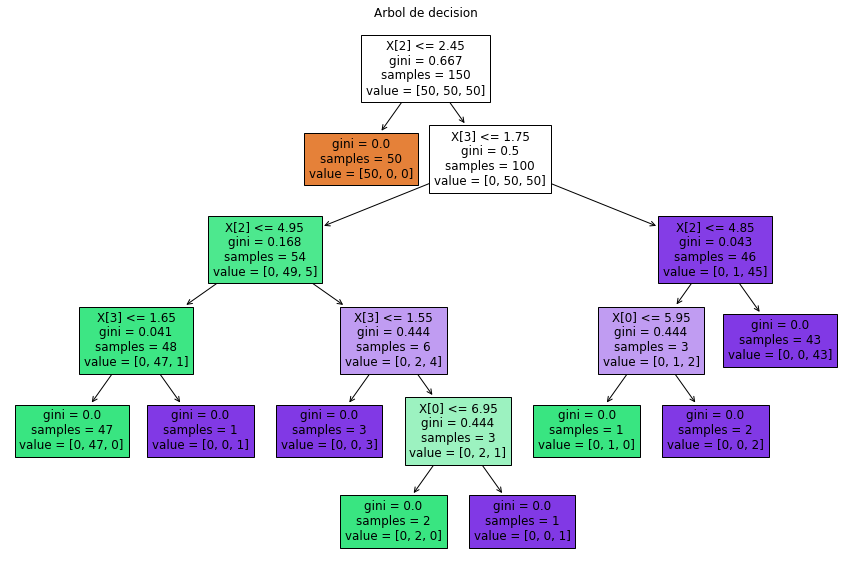

In [11]:
# Graficamos
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(dtc, filled=True)
plt.title('Arbol de decision')
plt.show()


#### Ejemplo 2

In [12]:
from sklearn.datasets import load_digits
data = load_digits()
X = data.data
Y = data.target

In [13]:
dtc = DecisionTreeClassifier()

In [14]:
dtc.fit(X,Y)

DecisionTreeClassifier()

In [15]:
dtc.score(X,Y)

1.0

In [17]:
dtc.get_depth()

15

In [34]:
# Evaluar separando el conjunto
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8, random_state=5)

In [35]:
dtc.fit(X_train,Y_train)
dtc.score(X_train, Y_train)

1.0

In [36]:
dtc.score(X_test, Y_test)

0.8555555555555555

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
lr.score(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


1.0

In [38]:
lr.score(X_test,Y_test)

0.9555555555555556

Limitando la profundidad

In [47]:
dtc = DecisionTreeClassifier(max_depth=8)

In [48]:
dtc.fit(X_train,Y_train)
dtc.score(X_train,Y_train)

0.9255393180236604

In [49]:
dtc.score(X_test,Y_test)

0.8305555555555556

# Arboles de decision para regresion

## 1. Dataset

Dataset 1

In [64]:
import numpy as np
X1 = np.linspace(-10.0,10.0,200)
Y1 = X1**2 + 2*X1 + 1 + np.random.randn(200)*8

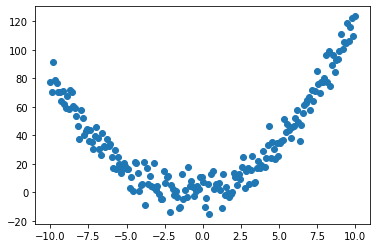

In [65]:
import matplotlib.pyplot as plt
plt.scatter(X,Y)
plt.show()

Dataset 2

In [66]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
X2 = data.data
Y2 = data.target

In [67]:
X2.shape, Y2.shape

((442, 10), (442,))

## 2. Modelo

In [69]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [71]:
dtr.fit(X1.reshape(-1,1),Y1)

DecisionTreeRegressor()

In [73]:
dtr.score(X1.reshape(-1,1),Y1)

1.0

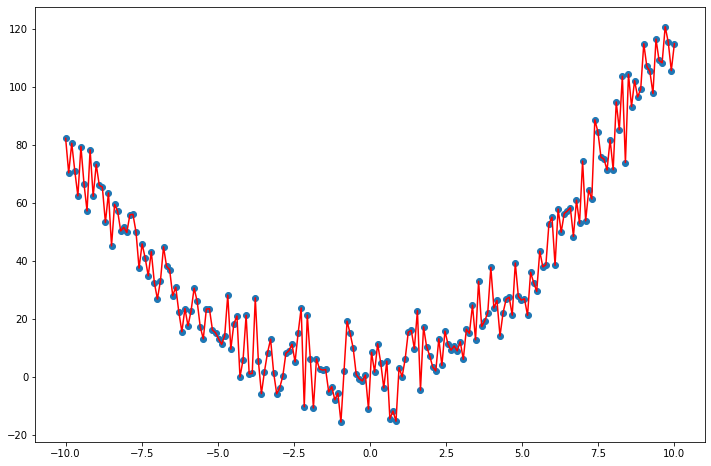

In [76]:
Y1_pred = dtr.predict(X1.reshape(-1,1))
plt.figure(figsize=(12,8))
plt.scatter(X1,Y1);
plt.plot(X1,Y1_pred,'r');
plt.show()

In [77]:
dtr.get_depth()

18

In [84]:
dtr2 = DecisionTreeRegressor(max_depth=5)
dtr2.fit(X1.reshape(-1,1),Y1)
dtr2.score(X1.reshape(-1,1),Y1)

0.9510501721876615

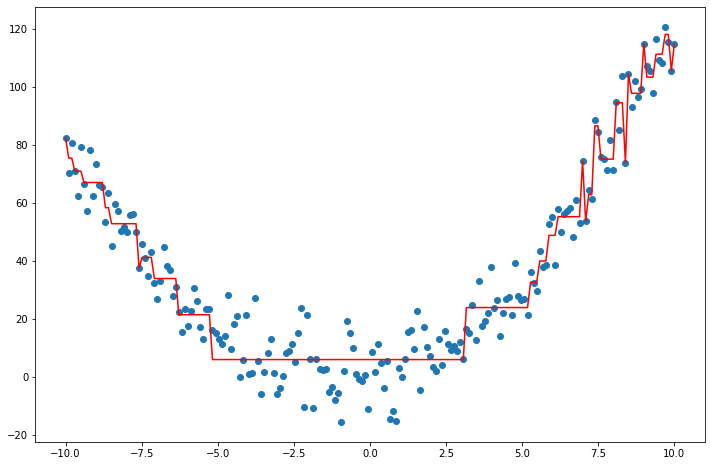

In [85]:
Y1_pred = dtr2.predict(X1.reshape(-1,1))
plt.figure(figsize=(12,8))
plt.scatter(X1,Y1);
plt.plot(X1,Y1_pred,'r');
plt.show()

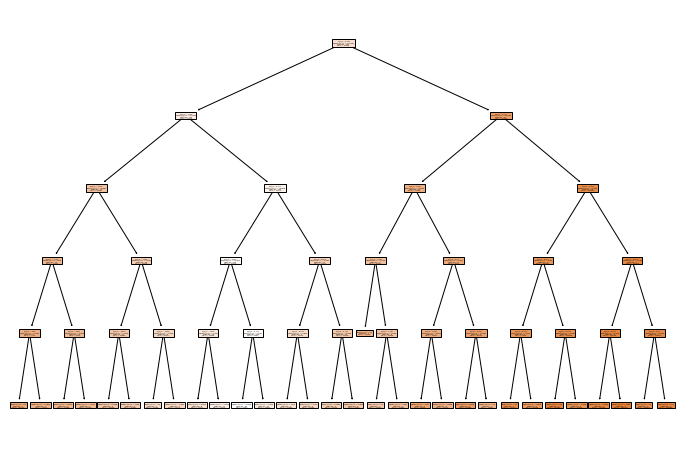

In [89]:
plt.figure(figsize=(12,8))
plot_tree(dtr2, filled=True)
plt.show()

### Exportar grafico

In [90]:
from sklearn.tree import export_graphviz
graph_path = './arbol.dot'
export_graphviz(dtr2,filled=True, out_file=graph_path)

In [91]:
! dot -Tpng arbol.dot > arbol.png